<a href="https://colab.research.google.com/github/ArezaB/Reza/blob/main/MannKendall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pymannkendall


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import statsmodels.api as sm
import pymannkendall as mk


In [5]:
from google.colab import files

# Upload your file
uploaded = files.upload()


Saving 02HB021.csv to 02HB021.csv


In [6]:
# Load the data from the uploaded Excel file
df = pd.read_csv('02HB021.csv')

# Display the first few rows to ensure it loaded correctly
df.head()


,Unnamed: 0,STATION_NUMBER,DATA_TYPE,YEAR,PEAK_CODE,PRECISION_CODE,MONTH,DAY,HOUR,MINUTE,TIME_ZONE,PEAK,SYMBOL
0,0,02HB021,Q,1987,H,NaN,8,9,11,58,EST,3.31,NaN
1,1,02HB021,Q,1988,H,NaN,9,4,15,43,EST,2.14,NaN
2,2,02HB021,Q,1989,H,NaN,7,26,15,55,EST,3.70,NaN
3,3,02HB021,Q,1990,H,NaN,12,29,17,19,EST,2.38,NaN
4,4,02HB021,Q,1991,H,NaN,3,27,9,38,EST,1.80,NaN


In [7]:
# Extract the PEAK column
peak_data = df['PEAK']

# Perform the Mann-Kendall test
result = mk.original_test(peak_data)


In [9]:
# Print the results
print("Trend: ", result.trend)
print("p-value: ", result.p)
print("Tau: ", result.Tau)
print("Slope: ", result.slope)
print("Intercept: ", result.intercept)


Trend:  decreasing
p-value:  0.043795902297401046
Tau:  -0.1406494960806271
Slope:  -0.00290909138592807
Intercept:  0.5317273058674553


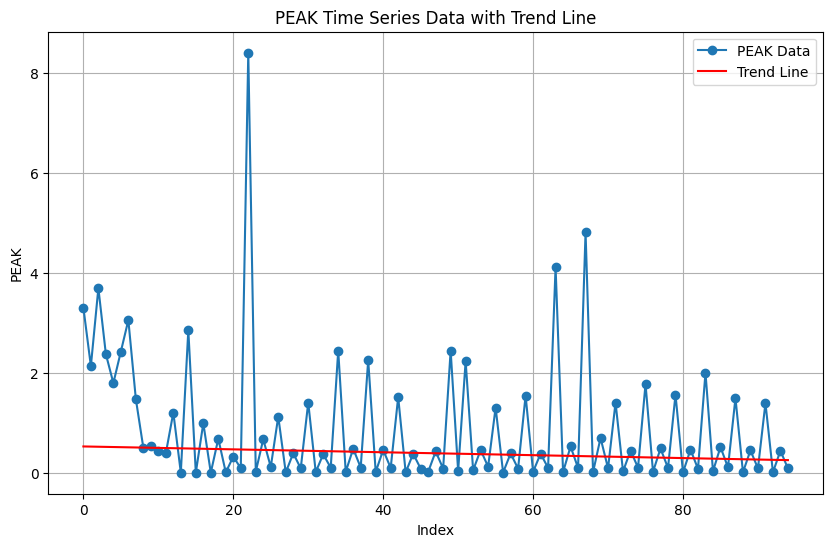

In [10]:
# Create a scatter plot of the PEAK data
plt.figure(figsize=(10, 6))
plt.plot(df.index, peak_data, marker='o', linestyle='-', label='PEAK Data')
plt.title('PEAK Time Series Data with Trend Line')
plt.xlabel('Index')
plt.ylabel('PEAK')
plt.grid(True)

# Add a trend line
plt.plot(df.index, result.intercept + result.slope * np.arange(len(peak_data)), color='red', label='Trend Line')
plt.legend()

plt.show()


In [11]:
!pip install openpyxl xlsxwriter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 2.7 MB/s eta 0:00:00


Results and plot saved to Results_02HB021.xlsx


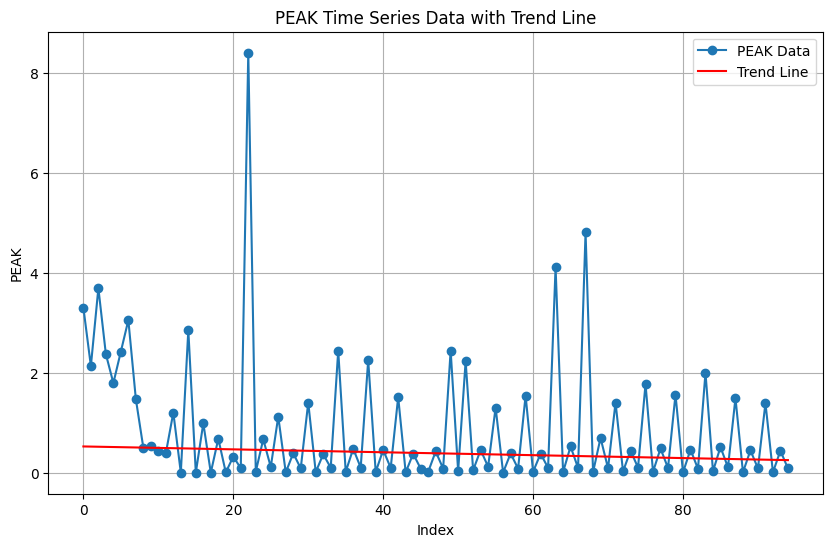

In [12]:
import openpyxl
import xlsxwriter

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Trend': [result.trend],
    'p-value': [result.p],
    'Tau': [result.Tau],
    'Slope': [result.slope],
    'Intercept': [result.intercept]
})

# Define the filename for the results
filename = 'Results_' + '02HB021.csv'.split('.')[0] + '.xlsx'

# Write the results DataFrame to an Excel file
with pd.ExcelWriter(filename, engine='xlsxwriter') as writer:
    results_df.to_excel(writer, sheet_name='Mann-Kendall Results', index=False)

    # Add the plot to the Excel file
    workbook  = writer.book
    worksheet = writer.sheets['Mann-Kendall Results']

    # Create a plot and save it as an image file
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, peak_data, marker='o', linestyle='-', label='PEAK Data')
    plt.title('PEAK Time Series Data with Trend Line')
    plt.xlabel('Index')
    plt.ylabel('PEAK')
    plt.grid(True)
    plt.plot(df.index, result.intercept + result.slope * np.arange(len(peak_data)), color='red', label='Trend Line')
    plt.legend()

    # Save the plot as an image
    plot_filename = 'plot.png'
    plt.savefig(plot_filename, dpi=300)

    # Insert the image into the Excel file
    worksheet.insert_image('G2', plot_filename)

# Notify the user
print(f'Results and plot saved to {filename}')
